# $\bbox[#000051,4px,padding:5px; border:3px solid lightBlue;border-radius:10px;]{\color{white}{\Large{\textbf{Keras : Numbers}}}}$

##$\bbox[Green,6px,padding:15px; border:5px solid lightGreen;border-radius:10px;]{\color{white}{\Large{\textbf{Import Data}}}}$


In [78]:
# import the libraries
import pandas as pd
import numpy as np

# load the data
df = pd.read_csv('train.csv')

# put the dataset in a numpy array
data = np.array(df)

# shuffling the data before splitting
np.random.shuffle(data)

df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



##$\bbox[Green,6px,padding:15px; border:5px solid lightGreen;border-radius:10px;]{\color{white}{\Large{\textbf{Splitting data}}}}$

In [79]:
# splitting data into 75% training and 25% validation

# 25% for validation
val_data = data[0: 10000].T
y_val = val_data[0] # first column is the target
X_val = val_data[1:785] # those are the features

# 75% for training
train_data = data[10000:40000].T
y_train = train_data[0] # first column is the target
X_train = train_data[1:785] # those are the features

# see the new shapes
print(train_data.shape, y_train.shape)

(785, 30000) (30000,)



##$\bbox[Green,6px,padding:15px; border:5px solid lightGreen;border-radius:10px;]{\color{white}{\Large{\textbf{Data Noramlization}}}}$

In [80]:
# Now the min and max values in order to apply the scale
min_val = data.min()
max_val = data.max()

print(min_val, max_val)

# Now let's apply the scale of 0 and 1
X_val = X_val / 255
X_train = X_train / 255

# check if the normalisation worked
X_val.max()

0 255


1.0

In [81]:
X_train.shape

(784, 30000)


$\text{Also, the input was a row of}\ 784 \ \text{But, now we need it as}\ 28\times 28 \text{.}$

$\text{Use}$ `reshape` $\text{function to change the dimentions to }\ (n,28,28) $

In [82]:
X_train = X_train.T.reshape(X_train.T.shape[0],28,28)
X_train.shape

(30000, 28, 28)

$\text{Do the same for}\ $ `X_val`

In [83]:
X_val = X_val.T.reshape(X_val.T.shape[0],28,28)
X_val.shape

(10000, 28, 28)


##$\bbox[Green,6px,padding:15px; border:5px solid lightGreen;border-radius:10px;]{\color{white}{\Large{\textbf{Show Samples}}}}$

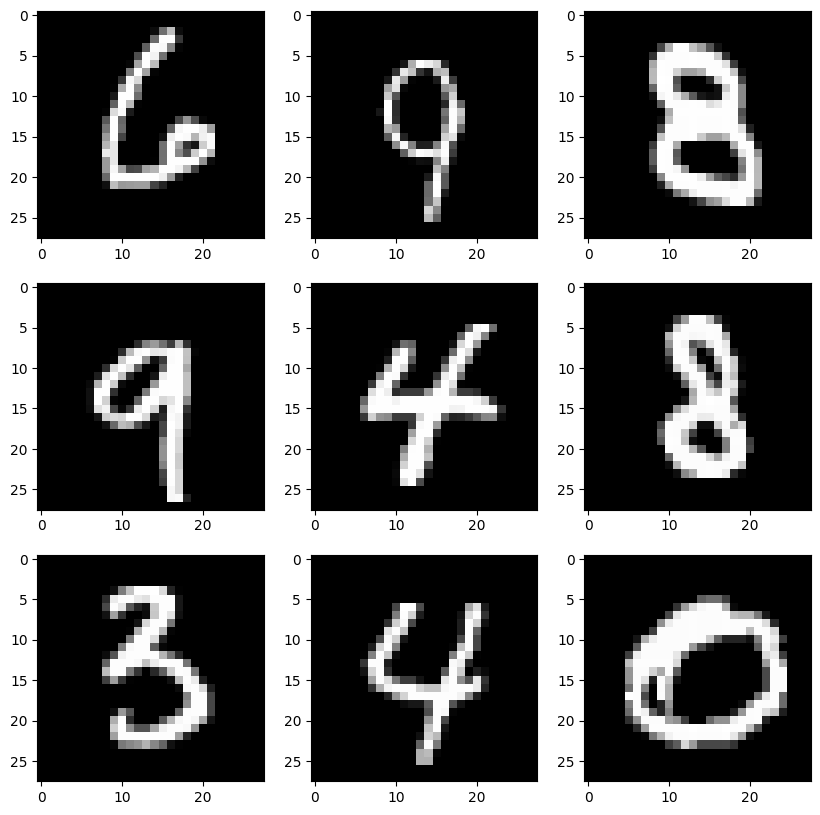

In [84]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
# viewing some values
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
a = 15

for i in range(3):
    for j in range(3):
        axes[i, j].imshow(X_train[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

##$\bbox[Green,6px,padding:15px; border:5px solid lightGreen;border-radius:10px;]{\color{white}{\Large{\textbf{Define the Outcomes}}}}$

Match the outcome image (number) to the `label_name`

In [85]:
# What are all the possible outcomes we have?
arr = np.array(y_train)
np.unique(arr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [86]:
# Since the outcomes are from 0 to 9, here are the names
class_name = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]

In [87]:
class_name[y_train[1]]

'Two'

##$\bbox[Green,6px,padding:15px; border:5px solid lightGreen;border-radius:10px;]{\color{white}{\Large{\textbf{Model Building}}}}$




###$\bbox[Green,2px,padding:0px; border:3px solid lightGreen;border-radius:00px;]{\color{white}{\Large{\text{7.1}\ \ \textbf{Build the Model}}}}$


In [88]:
model = keras.Sequential()

# input layer
model.add(keras.layers.Flatten(input_shape=[28,28]))

# hidden layers
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))

# outcome layer
model.add(keras.layers.Dense(10, activation = "softmax"))



###$\bbox[Green,2px,padding:0px; border:3px solid lightGreen;border-radius:00px;]{\color{white}{\Large{\text{7.2}\ \ \textbf{Print Model}}}}$


In [89]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 300)               235500    
                                                                 
 dense_36 (Dense)            (None, 100)               30100     
                                                                 
 dense_37 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##$\bbox[Green,6px,padding:15px; border:5px solid lightGreen;border-radius:10px;]{\color{white}{\Large{\textbf{Compiling & Fitting}}}}$




###$\bbox[Green,2px,padding:0px; border:3px solid lightGreen;border-radius:00px;]{\color{white}{\Large{\text{8.1}\ \ \textbf{Compiling}}}}$


In [90]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])



###$\bbox[Green,2px,padding:0px; border:3px solid lightGreen;border-radius:00px;]{\color{white}{\Large{\text{8.2}\ \ \textbf{Fitting}}}}$


In [91]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
938/938 [==============================] - 7s 6ms/step - loss: 0.7940 - accuracy: 0.8036 - val_loss: 0.3946 - val_accuracy: 0.8866
Epoch 2/30
938/938 [==============================] - 5s 5ms/step - loss: 0.3401 - accuracy: 0.9055 - val_loss: 0.3115 - val_accuracy: 0.9100
Epoch 3/30
938/938 [==============================] - 6s 6ms/step - loss: 0.2827 - accuracy: 0.9197 - val_loss: 0.2725 - val_accuracy: 0.9177
Epoch 4/30
938/938 [==============================] - 4s 4ms/step - loss: 0.2489 - accuracy: 0.9299 - val_loss: 0.2474 - val_accuracy: 0.9263
Epoch 5/30
938/938 [==============================] - 4s 4ms/step - loss: 0.2239 - accuracy: 0.9365 - val_loss: 0.2253 - val_accuracy: 0.9337
Epoch 6/30
938/938 [==============================] - 5s 6ms/step - loss: 0.2040 - accuracy: 0.9423 - val_loss: 0.2143 - val_accuracy: 0.9350
Epoch 7/30
938/938 [==============================] - 4s 4ms/step - loss: 0.1872 - accuracy: 0.9465 - val_loss: 0.2051 - val_accuracy: 0.9397
Epoch 

##$\bbox[Green,6px,padding:15px; border:5px solid lightGreen;border-radius:10px;]{\color{white}{\Large{\textbf{Model Evaluation}}}}$


###$\bbox[Green,2px,padding:0px; border:3px solid lightGreen;border-radius:00px;]{\color{white}{\Large{\text{9.1}\ \ \textbf{Plotting Validation}}}}$

$\text{Evalute the model by plotting the loss and accuracy on training, and validations sets over time.}$

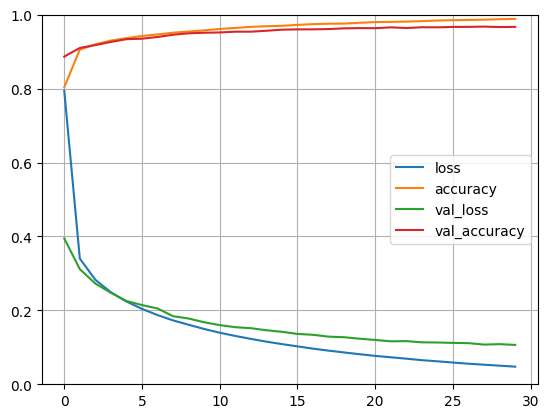

In [92]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

$\text{The accuracy of training goes higher and higher while the accuracy of validation set doesn't change that much.}$

$\color{#9B0000}{\text{And the same with the loss except it goes lower.}}$


###$\bbox[Green,2px,padding:0px; border:3px solid lightGreen;border-radius:00px;]{\color{white}{\Large{\text{9.2}\ \ \textbf{Test Set Evaluation}}}}$

First, load the data as done in [$\bbox[#000051,2px,padding:0px; border:3px solid lightBlue;border-radius:10px;]{\color{white}{{\text{Part 1}}}}$](#scrollTo=UzzA-4rVNVYy&line=1&uniqifier=1).

Then, we want to store it in `X_test` and `y_test` as done in [$\bbox[#000051,2px,padding:0px; border:3px solid lightBlue;border-radius:10px;]{\color{white}{{\text{Part 1}}}}$](#scrollTo=y7p7gXEcNVY4&line=9&uniqifier=1)

In [93]:
# Read the data and put in a NumPy array
test_data = np.array(pd.read_csv('test.csv'))

The first column of [`test_data`](#scrollTo=X5HiXMpKqbSK&line=2&uniqifier=1) is the label, store it in [`y_test`](#scrollTo=X5HiXMpKqbSK&line=4&uniqifier=1) and the rest of the columns in [`X_test`](#scrollTo=X5HiXMpKqbSK&line=3&uniqifier=1)

In [94]:
# split the test data to y and X.
test_data = test_data.T
y_test = test_data[0]
X_test = test_data[1:785]

In [95]:
# Reshape X so it compatible with the trained model
X_test = X_test.T.reshape(X_test.T.shape[0],28,28)
X_test.shape

(1500, 28, 28)


$\text{Now, check the model on the test set}$
give it the data (`X_test`) and the labels (`y_test`)

In [96]:
# Evaluate the test set with the trained model
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 23.5214 - accuracy: 0.9613


[23.5213565826416, 0.9613333344459534]


###$\bbox[Green,2px,padding:0px; border:3px solid lightGreen;border-radius:00px;]{\color{white}{\Large{\text{9.3}\ \ \textbf{Confusion Matrix}}}}$

[$\hat{y}$](#scrollTo=dsqLGkf8QY6o&line=2&uniqifier=1)$- \text{ The prediction over}\ \ $`X_test`.




47/47 [==============================] - 0s 2ms/step


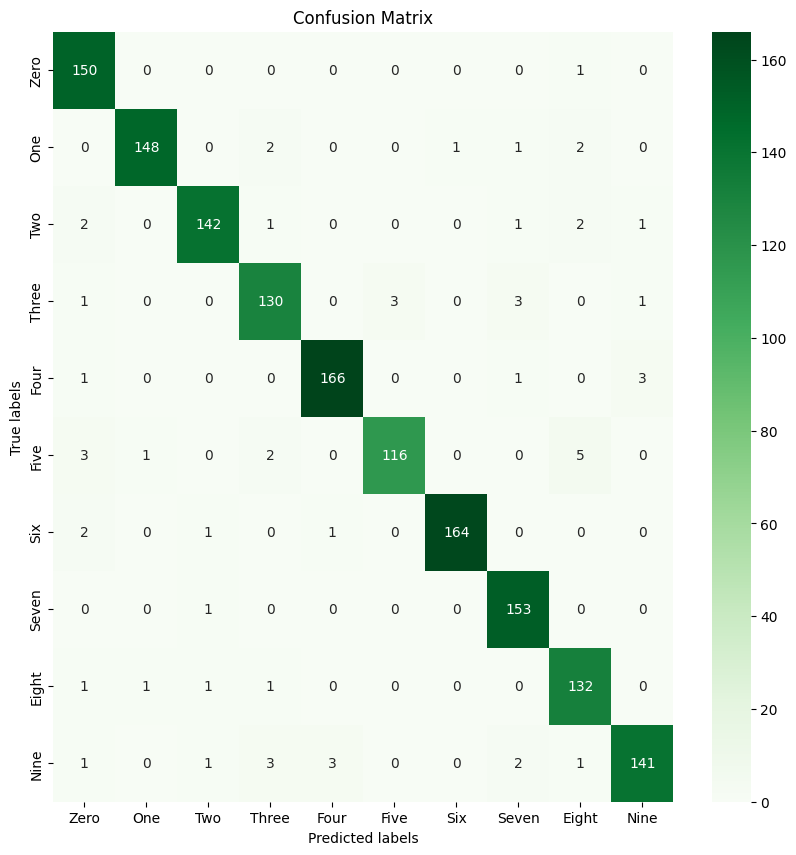

In [97]:
# prepare the confusion matrix
y_hat = model.predict(X_test)
y_classes = y_hat.argmax(axis=-1)
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

# plotting the confusion matrix
fig = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_name)
fig.yaxis.set_ticklabels(class_name)
fig.figure.set_size_inches(10, 10)

plt.show()

##$\bbox[Green,6px,padding:15px; border:5px solid lightGreen;border-radius:10px;]{\color{white}{\Large{\textbf{Improve the model}}}}$

In [98]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# splitting data
X_val = X_train[0:10000]
y_val = y_train[0:10000]

X_train = X_train[10000:]
y_train = y_train[10000:]

# Normalize pixel values to range [0, 1]
X_train, X_test, X_val = X_train / 255.0, X_test / 255.0, X_val / 255.0

# Reshape input data to 4D tensor (batch_size, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Define the model architecture
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=10, batch_size= 128, validation_data=(X_val, y_val))

Epoch 1/10
391/391 [==============================] - 40s 99ms/step - loss: 0.2302 - accuracy: 0.9336 - val_loss: 0.0696 - val_accuracy: 0.9789
Epoch 2/10
391/391 [==============================] - 39s 101ms/step - loss: 0.0576 - accuracy: 0.9820 - val_loss: 0.0705 - val_accuracy: 0.9784
Epoch 3/10
391/391 [==============================] - 39s 99ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0486 - val_accuracy: 0.9868
Epoch 4/10
391/391 [==============================] - 40s 103ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0490 - val_accuracy: 0.9861
Epoch 5/10
391/391 [==============================] - 40s 103ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0506 - val_accuracy: 0.9857
Epoch 6/10
391/391 [==============================] - 38s 96ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0402 - val_accuracy: 0.9887
Epoch 7/10
391/391 [==============================] - 38s 97ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0470 - val_accura

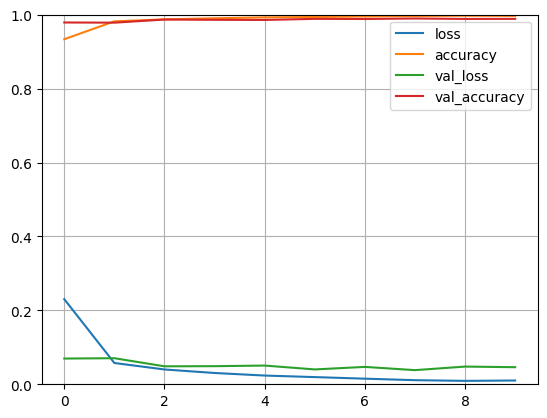

In [99]:
pd.DataFrame(history_1.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [100]:
# Evaluate the test set with the trained model
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0293 - accuracy: 0.9915


[0.029343539848923683, 0.9915000200271606]

313/313 [==============================] - 5s 15ms/step


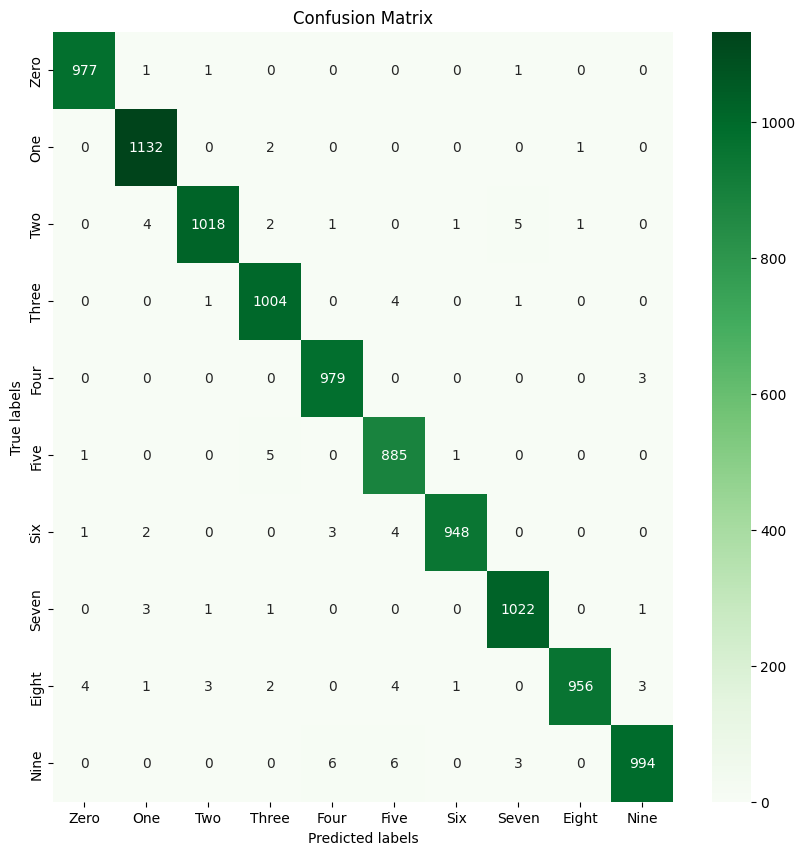

In [101]:
# prepare the confusion matrix
y_hat = model_1.predict(X_test)
y_classes = y_hat.argmax(axis=-1)
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

# plotting the confusion matrix
fig = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_name)
fig.yaxis.set_ticklabels(class_name)
fig.figure.set_size_inches(10, 10)

plt.show()